### Which Machine LEarning Models Are Sensitive To Outliers?
1. Naivye Bayes Classifier--- Not Sensitive To Outliers
2. SVM-------- Not Sensitive To Outliers
3. Linear Regression---------- Sensitive To Outliers
4. Logistic Regression------- Sensitive To Outliers
5. Decision Tree Regressor or Classifier---- Not Sensitive
6. Ensemble(RF,XGboost,GB)------- Not Sensitive
7. KNN--------------------------- Not Sensitive
8. Kmeans------------------------ Sensitive
9. Hierarichal------------------- Sensitive
10. PCA-------------------------- Sensitive
11. Neural Networks-------------- Sensitive

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\data set\audi.csv')

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [4]:
df.shape

(10668, 9)

<AxesSubplot:xlabel='tax', ylabel='Density'>

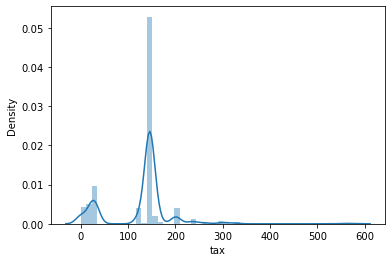

In [5]:
sns.distplot(df['tax'])

In [6]:
df['tax'].describe()

count    10668.000000
mean       126.011436
std         67.170294
min          0.000000
25%        125.000000
50%        145.000000
75%        145.000000
max        580.000000
Name: tax, dtype: float64

<AxesSubplot:xlabel='tax'>

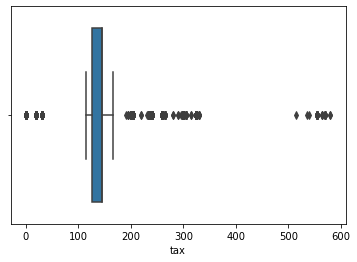

In [7]:
sns.boxplot(df['tax'])

In [8]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

uppper_boundary=df['tax'].mean() + 3* df['tax'].std()
lower_boundary=df['tax'].mean() - 3* df['tax'].std()
print(lower_boundary), print(uppper_boundary),print(df['tax'].mean())

-75.49944543580688
327.52231757678925
126.01143607049119


(None, None, None)

In [9]:
IQR = df['tax'].quantile(0.75) - df['tax'].quantile(0.25)

In [10]:
lower_bridge=df['tax'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['tax'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

95.0
175.0


(None, None)

<AxesSubplot:xlabel='mpg', ylabel='Density'>

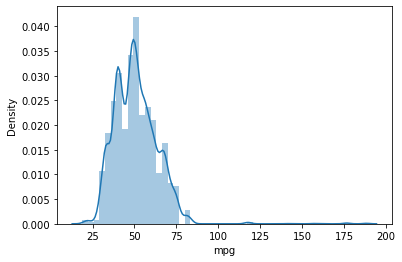

In [11]:
sns.distplot(df['mpg'])

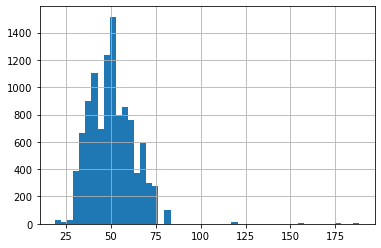

In [12]:
figure=df.mpg.hist(bins=50)

In [13]:
df['mpg'].describe()

count    10668.000000
mean        50.770022
std         12.949782
min         18.900000
25%         40.900000
50%         49.600000
75%         58.900000
max        188.300000
Name: mpg, dtype: float64

In [14]:
df[['tax','mpg']].isna().sum()

tax    0
mpg    0
dtype: int64

In [15]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

uppper_boundary=df['mpg'].mean() + 3* df['mpg'].std()
lower_boundary=df['mpg'].mean() - 3* df['mpg'].std()
print(lower_boundary), print(uppper_boundary),print(df['mpg'].mean())

11.920677874066335
89.61936712031152
50.77002249718893


(None, None, None)

<AxesSubplot:xlabel='mpg'>

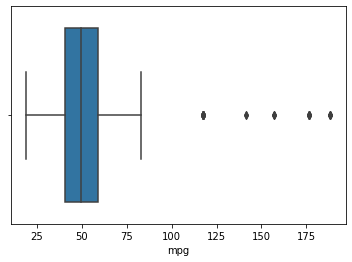

In [16]:
sns.boxplot(df['mpg'])

In [17]:
data = df.copy()

In [18]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [19]:
data[data['tax']<175].shape

(9749, 9)

In [20]:
10668-9749

919

#### treating outliers

In [21]:
data.loc[data['tax']>175,'tax']=175

In [24]:
data.loc[data['tax']<95,'tax']=95

In [26]:
data.shape

(10668, 9)

In [27]:
data.loc[data['mpg']>=89,'mpg']=89

In [28]:
data.loc[data['mpg']<=11,'mpg']=11

In [29]:
data.shape

(10668, 9)

In [33]:
x = data[['tax','mpg']]
y = data['price']

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=142)

In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [37]:
from sklearn.metrics import r2_score,accuracy_score

In [38]:
r2_score(y_test,model.predict(x_test))

0.4303608598457731

In [39]:
r2_score(y_train,model.predict(x_train))

0.4445302493319335

<AxesSubplot:xlabel='price'>

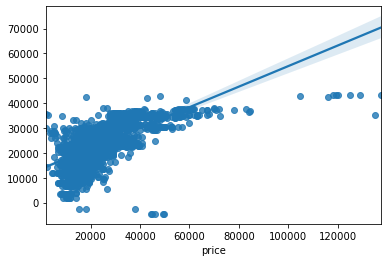

In [40]:
sns.regplot(y_test,model.predict(x_test))

In [42]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(x_train,y_train)

RandomForestRegressor()

In [43]:
r2_score(y_test,reg.predict(x_test))

0.780737203065111

In [44]:
r2_score(y_train,reg.predict(x_train))

0.7791094103029498